# Comparison of Machine learning models on Electrical grid stability simulated data


This project investigates the Electrical Grid Stability Simulated dataset using a range of machine learning techniques. The goal is to compare their performance, strengths, and limitations. The models include K-Nearest Neighbors (KNN), Decision Trees, Principal Component Analysis (PCA) for dimensionality reduction, and Support Vector Machines (SVM) with both linear and radial basis function (RBF) kernels.

**K-Nearest Neighbors (KNN)**: Simple and intuitive, effective for classification but computationally expensive for large datasets.

**Decision Trees**: Capable of modeling nonlinear relationships and easy to interpret, but prone to overfitting and sensitive to data changes.

**Principal Component Analysis (PCA)**: A dimensionality reduction technique that transforms data into fewer uncorrelated variables, improving efficiency but potentially reducing interpretability.

**Support Vector Machine (SVM) with Linear Kernel**: Works well when data is linearly separable and in high-dimensional spaces, but may underperform with complex nonlinear patterns.

**Support Vector Machine (SVM) with RBF Kernel**: Powerful for capturing nonlinear relationships, but performance depends heavily on tuning parameters such as C and gamma.


### **1. K-Nearest Neighours (KNN)**

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = pd.read_csv('Data_for_UCI_named.csv', comment='#')

**1.1. KNN model**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Set stabf as target
X = data.drop(columns=['stabf'])
y = data['stabf']


# Split: 75% training, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fitting KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting the classes
y_pred_knn = knn.predict(X_test)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Performance report and accuracy
print("Performance Metrics:")
print("Accuracy:", accuracy_knn)
print("\nClassification Report:")
print(report_knn)

# Printing the hyperparameters used in the model
print("Model Hyperparameters:")
print(knn.get_params())

Performance Metrics:
Accuracy: 0.7824

Classification Report:
              precision    recall  f1-score   support

      stable       0.69      0.67      0.68       870
    unstable       0.83      0.84      0.83      1630

    accuracy                           0.78      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.78      0.78      0.78      2500

Model Hyperparameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


**1.2 Further explore KNN model by varying distance metrics such as using cityblock and manhattan.**

In [3]:
def knn_classification(X_train, X_test, y_train, y_test, metric):
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return  accuracy, report

# Report performance for KNN with cityblock distance metric
accuracy_cityblock, report_cityblock = knn_classification(X_train, X_test, y_train, y_test, metric='cityblock')
print("Performance Metrics with Cityblock Distance:\n",report_cityblock)
print("Accuracy:", accuracy_cityblock)

# Report performance for KNN with Manhattan distance metric
accuracy_manhattan, report_manhattan = knn_classification(X_train, X_test, y_train, y_test, metric='manhattan')
print("\nPerformance Metrics with Manhattan Distance Metric:\n",report_manhattan)
print("Accuracy:", accuracy_manhattan)

Performance Metrics with Cityblock Distance:
               precision    recall  f1-score   support

      stable       0.75      0.74      0.74       870
    unstable       0.86      0.87      0.86      1630

    accuracy                           0.82      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.82      0.82      0.82      2500

Accuracy: 0.822

Performance Metrics with Manhattan Distance Metric:
               precision    recall  f1-score   support

      stable       0.75      0.74      0.74       870
    unstable       0.86      0.87      0.86      1630

    accuracy                           0.82      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.82      0.82      0.82      2500

Accuracy: 0.822


The accuracry scores as well as precisions, recalls, f1-scores of both KNN models with Cityblock and Manhattan metrics are the same. Compared to the KNN model developed in Q1, the accuracy scores of the models in Q3 are slightly better. 
Overall, the performances of three models in predicting unstable class are similar. Models using Cityblock and Manhattan metrics have higher accuracry scores and perform better in predicting stable class.

### 2.  Classification model using Decision Trees. Two data splitting methods: 50-50% and 80-20%.

In [4]:
from sklearn.tree import DecisionTreeClassifier

def evaluate_model(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# split 50-50%
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5, random_state=42)
accuracy_50, report_50 = evaluate_model(X_train_50, X_test_50, y_train_50, y_test_50)

print("Performance Metrics with 50-50% Data Splitting:\n", report_50)
print("Accuracy:", accuracy_50)

# 80-20% data splitting
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
accuracy_80, report_80 = evaluate_model(X_train_80, X_test_80, y_train_80, y_test_80)

print("\nPerformance Metrics with 80-20% Data Splitting:\n",report_80)
print("Accuracy:", accuracy_80)

Performance Metrics with 50-50% Data Splitting:
               precision    recall  f1-score   support

      stable       1.00      1.00      1.00      1795
    unstable       1.00      1.00      1.00      3205

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Accuracy: 0.9998

Performance Metrics with 80-20% Data Splitting:
               precision    recall  f1-score   support

      stable       1.00      1.00      1.00       693
    unstable       1.00      1.00      1.00      1307

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 0.9995


The performances of both models are similarly well.

### 3. PCA model: select first three components except "stabf" (target). Print the dimension of modified dataset and visualise the data

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = pd.read_csv('Data_for_UCI_named.csv', comment='#')

print("Original Dataset Dimension:", data.shape) #Dimension of the dataset

Original Dataset Dimension: (10000, 14)


In [6]:
# Set stabf as target
X = data.drop(columns=['stabf'])
y = data['stabf']

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print("Modified Dataset Dimension:", X_pca.shape)


Modified Dataset Dimension: (10000, 3)


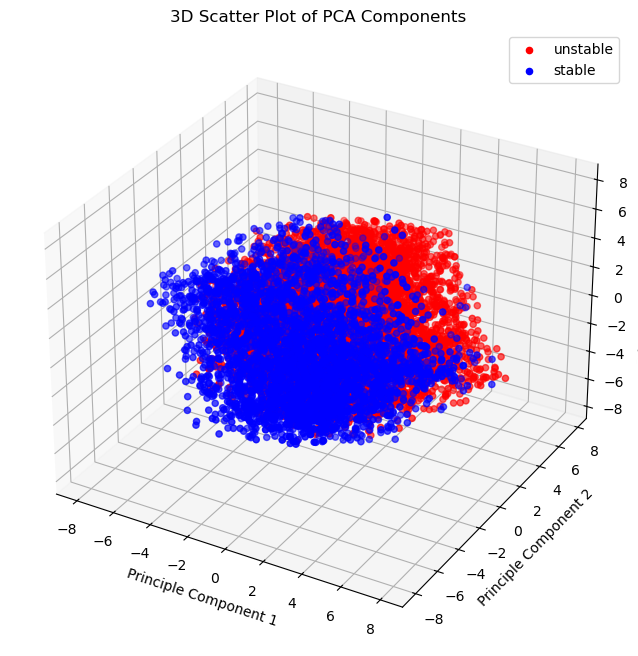

In [7]:
# Create DataFrame of the modified dataset
modified_data = pd.DataFrame(X_pca, columns=['Principle Component 1', 'Principle Component 2', 'Principle Component 3'])
modified_data['stabf'] = y

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {'unstable': 'red', 'stable': 'blue'}

for stabf, color in colors.items():
    subset = modified_data[y == stabf]
    ax.scatter(subset['Principle Component 1'], subset['Principle Component 2'], subset['Principle Component 3'], c=color, label=stabf)

ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')
ax.set_title('3D Scatter Plot of PCA Components')
plt.legend()
plt.show()

### 4a. SVM with linear kernel

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#Split: 75% training, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Training
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Evaluation
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

#Model Hyperparameters
print("Model Hyperparameters - Kernel:", svm_classifier.kernel)

Accuracy: 0.9448
Classification Report:
               precision    recall  f1-score   support

      stable       0.92      0.92      0.92       870
    unstable       0.96      0.96      0.96      1630

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

Model Hyperparameters - Kernel: linear


### 4b. SVM with rbf kernel

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

X_train_q4, X_test_q4, y_train_q4, y_test_q4 = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training with SVM and RBF kernel
svm_classifier_q4 = SVC(kernel='rbf')
svm_classifier_q4.fit(X_train_q4, y_train_q4)

# Model Evaluation
y_pred_q4 = svm_classifier.predict(X_test_q4)
accuracy_q4 = accuracy_score(y_test_q4, y_pred_q4)
classification_q4 = classification_report(y_test_q4, y_pred_q4)

In [10]:
print("Accuracy:", accuracy_q4)
print("Classification Report:\n", classification_q4)
print("Model Hyperparameters:\n")
print("Kernel:", svm_classifier_q4.kernel)
print("C:", svm_classifier_q4.C)
print("Gamma:", svm_classifier_q4.gamma)

Accuracy: 0.9448
Classification Report:
               precision    recall  f1-score   support

      stable       0.92      0.92      0.92       870
    unstable       0.96      0.96      0.96      1630

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

Model Hyperparameters:

Kernel: rbf
C: 1.0
Gamma: scale
